# Permutation Feature Importance with Random Forest

**Permutation feature importance** is a model inspection technique that does not rely on the internal structure of the model. It is especially useful for non-linear models like Random Forests.

The process involves the following steps:
1. A model is trained on the dataset and its performance is evaluated.
2. A single feature's values are randomly shuffled, and the model's performance is evaluated again.
3. The drop in the model's performance is indicative of the importance of the feature.
4. Steps 2 and 3 are repeated for each feature in the dataset.

This method is model agnostic and can be used with any model, though it is particularly useful for models where feature importance is not straightforward to calculate.


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [2]:
# Load dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
data = pd.read_csv(url)

In [3]:
# Data preprocessing
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data.fillna({'Age': data['Age'].mean()}, inplace=True)
X = data[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = data['Survived']

In [4]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44212)

In [5]:
429/(429+280)

0.6050775740479548

In [6]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=87524)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=87524)

In [7]:
# Evaluate the classifier
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.797752808988764


In [8]:
(.7977 - .6050)/(.6050)

0.3185123966942149

In [9]:
# Compute permutation feature importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=45322)

Text(0.5, 0, 'Permutation Feature Importance')

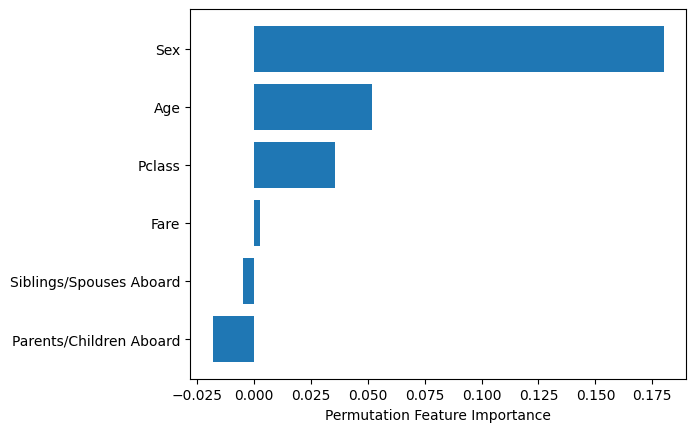

In [10]:
import matplotlib.pyplot as plt
# Display feature importances
feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Feature Importance")


## Interpreting Permutation Feature Importance in Random Forest

When using permutation feature importance, we observe the change in a model's performance (e.g., accuracy) as we randomly shuffle each feature's values. This method provides insight into which features are contributing most to the model's predictive power. However, interpreting these importances, especially when they are negative, requires careful consideration.

### Positive Feature Importance
- **Positive Values:** When the importance is positive, it implies that random shuffling of the feature values leads to a decrease in model performance. In other words, the original order of values in this feature had a significant contribution to the model’s predictive accuracy. A higher positive value indicates greater importance.

### Negative Feature Importance
- **Negative Values:** Negative importance values can be somewhat counterintuitive. They occur when the random permutation of the feature values leads to an *increase* in model performance. This could happen for several reasons:
  - **Noise or Redundancy:** The feature might be noisy or redundant with respect to the target variable. In this case, shuffling it could remove misleading patterns that the model was initially picking up.
  - **Model Overfitting:** The model might have overfitted to the noise or specific patterns in this feature. When shuffled, the overfitting is reduced, and the model performs better on the test data.
  - **Interactions with Other Features:** Sometimes, a feature's importance depends on its interactions with other features. Shuffling it might align better with these interactions by chance.

### Key Takeaways
1. **Context Matters:** Always interpret feature importances in the context of the model and the data. Understand the features and how they relate to the target variable.
2. **Absolute Importance:** Focus on the absolute value of the importance score to gauge the feature's overall impact on the model, whether positive or negative.
3. **Model Dependence:** Remember that permutation importance is model-dependent. Different models might yield different importance scores for the same feature set.
4. **Further Analysis:** Treat negative importances as a starting point for further analysis. Investigate if the feature is noisy, redundant, or interacting in unexpected ways with other features.

Permutation feature importance is a powerful tool, but it's essential to approach its interpretation with a nuanced understanding of both the data and the model.


# Partial Dependence Plots with Random Forest

Partial dependence plots (PDPs) offer a visual representation of the relationship between a feature (or a set of features) and the predicted outcome in a machine learning model. They are particularly useful for understanding the influence of individual features in complex models like Random Forests.

## Key Concepts:
- **Target Variable Dependence:** PDPs show how the expected target variable changes with variations in a feature, after accounting for the average effects of other features.
- **Feature Range:** They typically plot the feature of interest on the x-axis and the predicted outcome on the y-axis.
- **Model Insight:** PDPs provide insight into the model's behavior, particularly for non-linear relationships or interactions between features.

PDPs are beneficial for gaining a deeper understanding of the model's decision-making process, especially in non-linear models where the relationship between features and the target variable is not straightforward.


In [ ]:
! pip install pdpbox

In [21]:
from pdpbox import pdp

# Create instance of PDPIsolate for the 'Parents/Children Aboard' feature
pdp_iso = pdp.PDPIsolate(
    model=rf,
    df=X_train,
    model_features=X.columns.tolist(),
    feature='Parents/Children Aboard',
    feature_name='Parents/Children Aboard'
)

# Plotting the PDP with matplotlib engine
fig, axes = pdp_iso.plot(
    'Parents/Children Aboard',
    plot_lines=True,
    frac_to_plot=0.5,
    plot_pts_dist=True,
    show_percentile=True,
    engine='matplotlib'  # Set the engine to matplotlib
)


Output hidden; open in https://colab.research.google.com to view.

After looking at both the permutation chart and the PDP I'm starting to believe that Parents/Children Aboard are net negatives to include in the model and I think I will take it out as a feature.

## Interpreting Partial Dependence Plots

Interpreting partial dependence plots (PDPs) involves understanding the relationship between the feature(s) of interest and the target variable.

### Key Interpretation Points:
1. **Flat Line:** If the PDP is relatively flat, it suggests that the feature has little impact on the prediction.
2. **Sloping Line:** A sloping line, whether upward or downward, indicates that the feature positively or negatively impacts the prediction, respectively.
3. **Non-linear Patterns:** Non-linear patterns can indicate more complex relationships where the impact of the feature on the prediction changes across its range.
4. **Steep Sections:** Steep sections in the plot suggest areas where the model is particularly sensitive to changes in the feature value.
5. **Multiple Features:** When analyzing PDPs for multiple features, look for interactions between features that might affect the predictions.

Remember, PDPs illustrate the average effect of a feature on the prediction. They do not show the distribution of the feature or capture the possible interactions unless specifically designed for that purpose. They are a powerful tool for model interpretation but should be used alongside other techniques for a comprehensive understanding.


obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

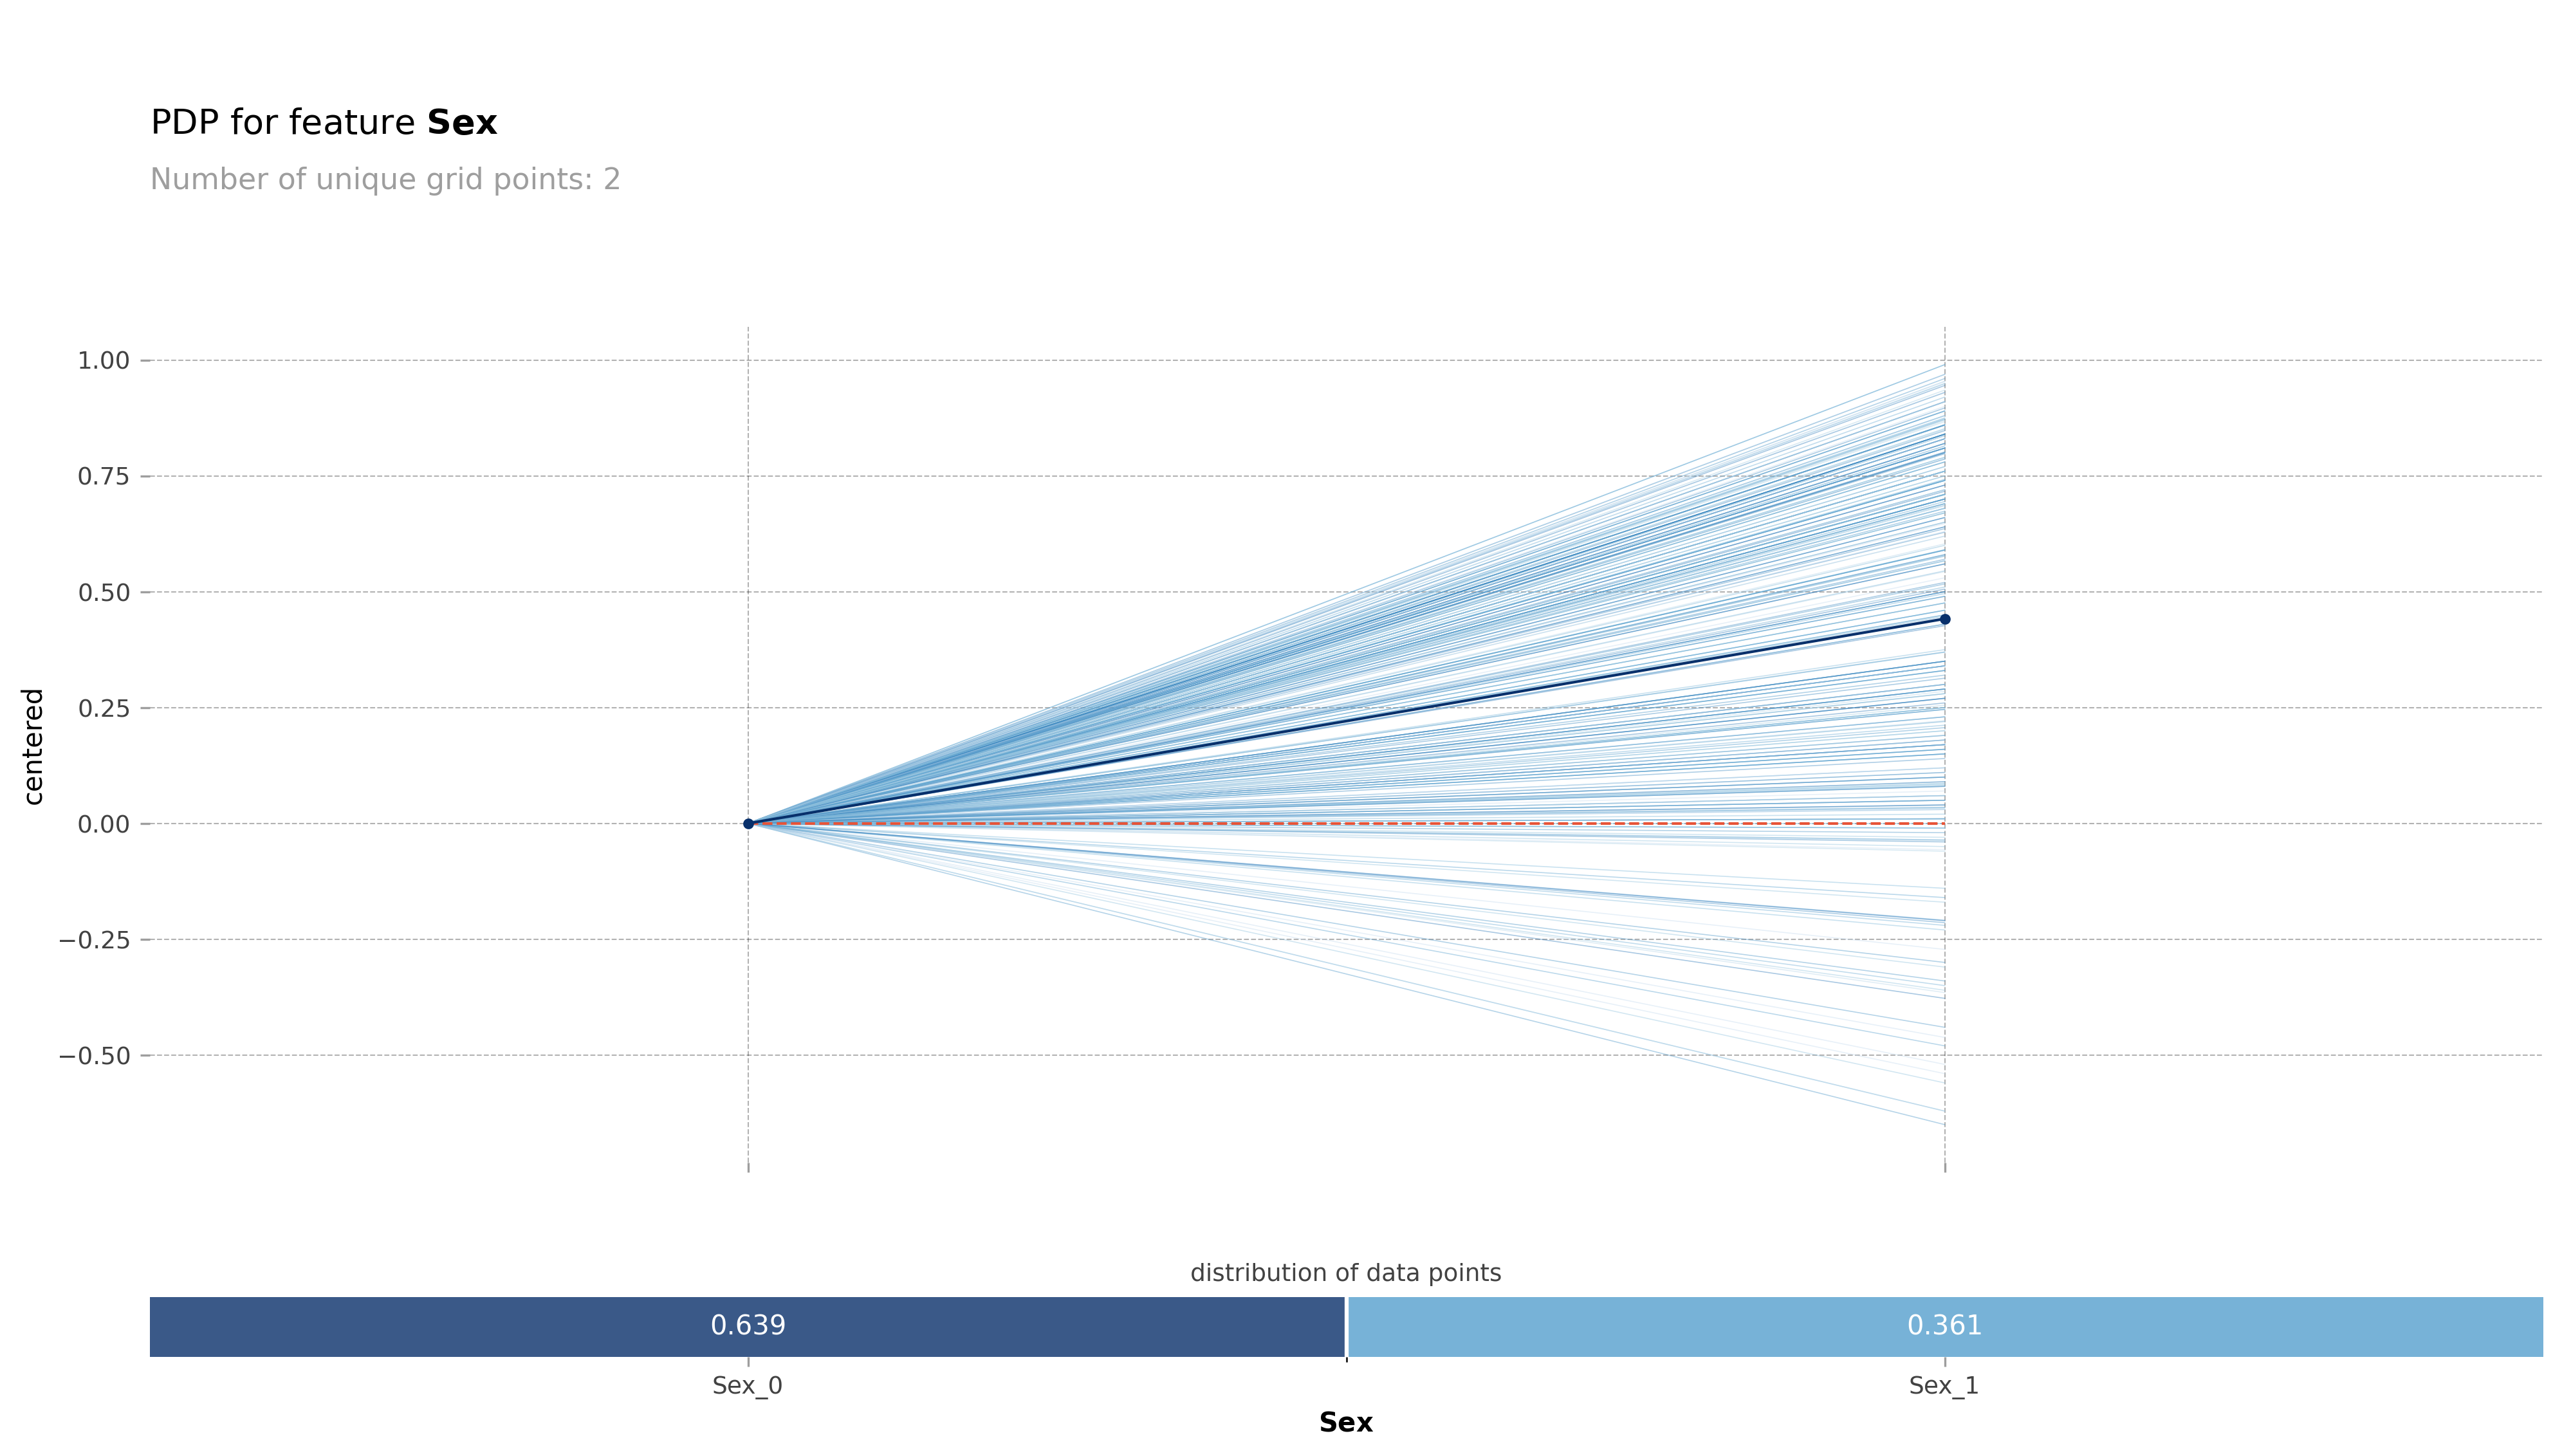

In [22]:

# Create instance of PDPIsolate for the 'Sex' feature
pdp_iso = pdp.PDPIsolate(
    model=rf,
    df=X_train,
    model_features=X.columns.tolist(),
    feature='Sex',
    feature_name='Sex'
)

# Plotting the PDP with matplotlib engine
fig, axes = pdp_iso.plot(
    'Sex',
    plot_lines=True,
    frac_to_plot=0.5,
    plot_pts_dist=True,
    show_percentile=True,
    engine='matplotlib'  # Set the engine to matplotlib
)


# Introduction to Interaction Dependence Plots

## Understanding Interaction Dependence Plots
Interaction Dependence Plots (IDPs) are powerful tools in machine learning interpretability, especially useful for exploring the interaction effects between two features on the predicted outcome of a model. These plots help in understanding whether the relationship between a feature and the target variable changes depending on the value of another feature.

## Key Concepts:
- **Feature Interactions:** IDPs focus on how the combined values of two features impact the model's predictions. This is crucial for identifying non-additive relationships between features.
- **Visual Representation:** These plots typically show one feature on the x-axis, another on the y-axis, and the predicted outcome is represented through color gradients or contour lines.
- **Model Complexity:** They are particularly beneficial for complex models like Random Forests or Gradient Boosted Trees, where interactions are not directly observable.

IDPs are instrumental in revealing complex patterns and interactions that might not be apparent through traditional feature importance or single-variable dependence plots. They add an additional layer of understanding to model interpretation.


obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/20 [00:00<?, ?it/s]

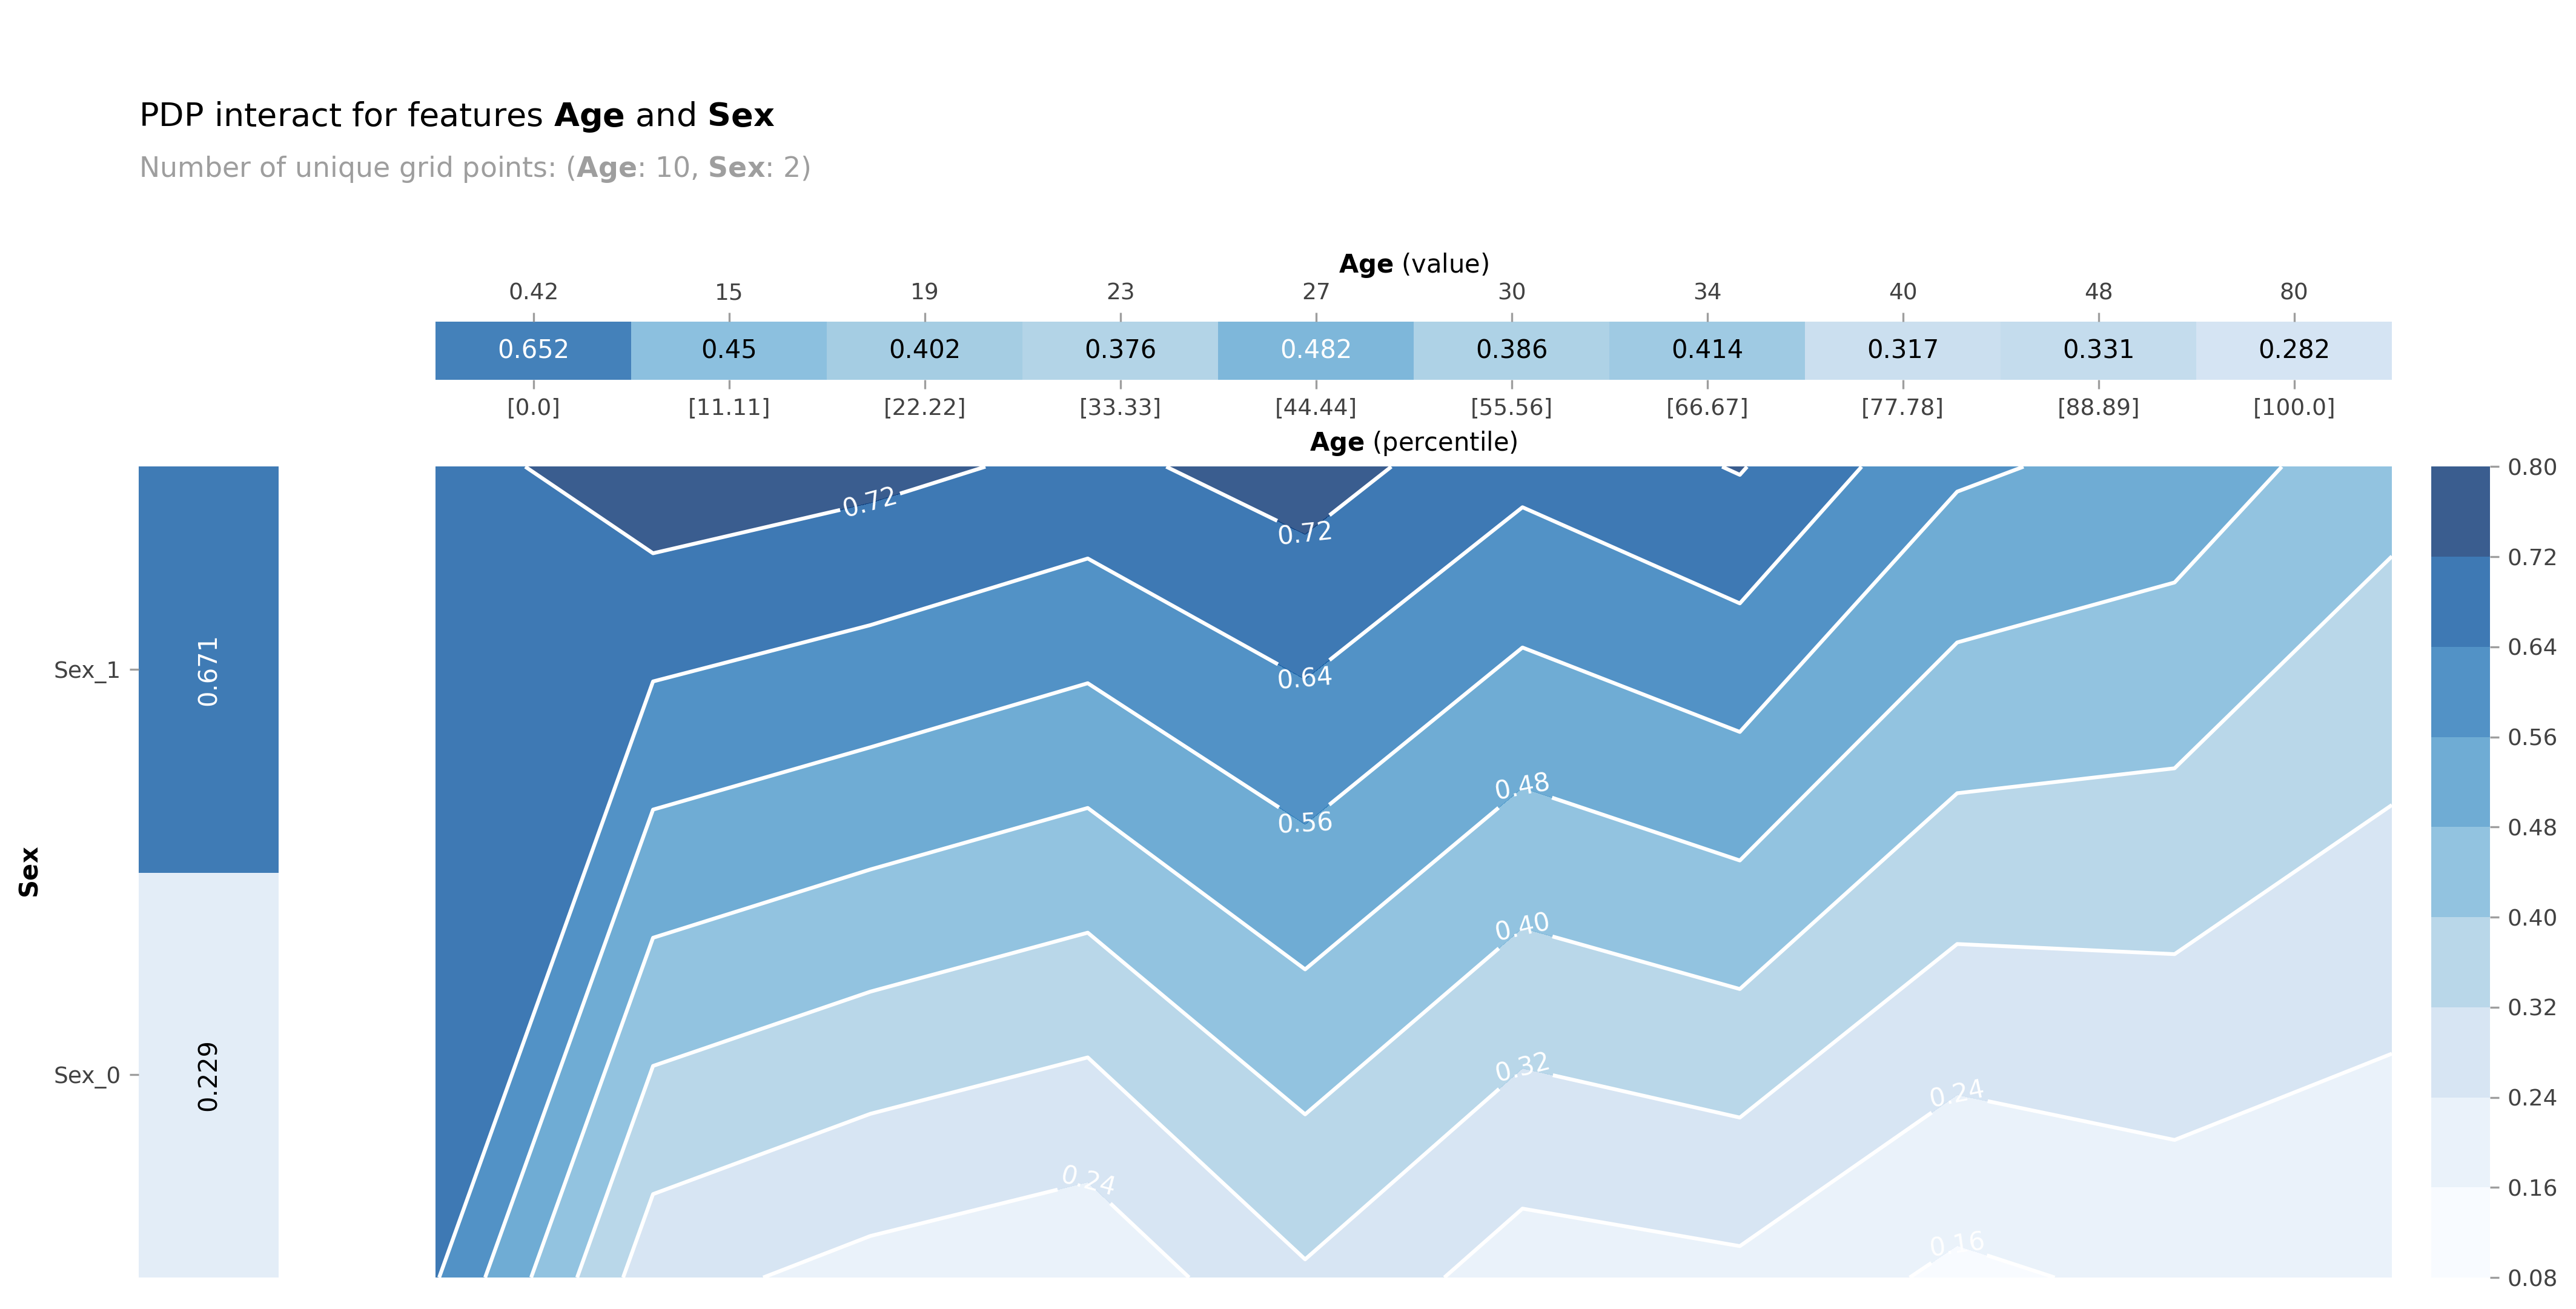

In [28]:
# Create instance of PDPInteract for 'Age' and 'Sex' features
features = ['Age', 'Sex']
feature_names = ['Age', 'Sex']
pdp_interact = pdp.PDPInteract(
    model=rf,
    df=X_train,
    model_features=X.columns.tolist(),
    features=features,
    feature_names=feature_names
)

# Plotting the interaction plot
fig, axes = pdp_interact.plot(
    plot_type='contour',
    plot_pdp=True,
    to_bins=True,
    show_percentile=True,
    engine='matplotlib'  # Use matplotlib engine for compatibility with Jupyter
)
plt.show()

# Interpreting Interaction Dependence Plots

## Key Strategies for Interpretation:
1. **Visual Patterns:** Look for distinct patterns in the plot. Uniform colors or contour lines indicate little to no interaction between the features. In contrast, varying colors or contours signify that the interaction between features significantly affects the prediction.
2. **Feature Value Combinations:** Pay attention to areas with strong changes in color or contours. These regions indicate specific combinations of feature values that have a high impact on the predicted outcome.
3. **Model Sensitivity:** Areas with closely packed contour lines or sharp color transitions show where the model is most sensitive to changes in feature values.
4. **Interactions vs. Individual Effects:** Distinguish between the effects of individual features and their interaction. Two features might have a significant individual impact but may not interact significantly, or vice versa.

## Practical Implications:
- **Model Refinement:** Understanding interactions can guide feature engineering and model refinement. It might suggest transforming features or creating new interaction terms in the model.
- **Domain Insights:** These plots often reveal insights that align with or contradict domain knowledge, leading to deeper investigations.
- **Decision Making:** For decision-focused models, understanding feature interactions is crucial for predicting outcomes under various scenarios.

Interpreting IDPs requires a balance between technical understanding and domain expertise. They are a window into the "black box" of complex models, offering a more nuanced view of how feature combinations influence predictions.


# Introduction to Multi-way Importance Plots

## Understanding Multi-way Importance Plots
Multi-way Importance Plots are advanced visualization tools in machine learning that illustrate the interactions between three different features and their combined effect on the predicted outcome of a model. These plots are particularly useful for uncovering complex, multi-dimensional relationships in data.

## Key Concepts:
- **Three-way Interaction:** These plots reveal how the combination of three features influences the model's predictions, offering a deeper insight than two-way interactions.
- **Visualization Complexity:** Due to their three-dimensional nature, these plots can be more challenging to create and interpret. They often require advanced plotting techniques like 3D surfaces or color-coded heatmaps.
- **Model Insight:** Multi-way plots are especially valuable for complex models (e.g., Random Forest, Gradient Boosting) where interactions between three or more features significantly impact predictions.

Given their complexity, multi-way importance plots are best used when two-way interactions do not provide sufficient insight or when there's a specific hypothesis about the interaction of three variables.


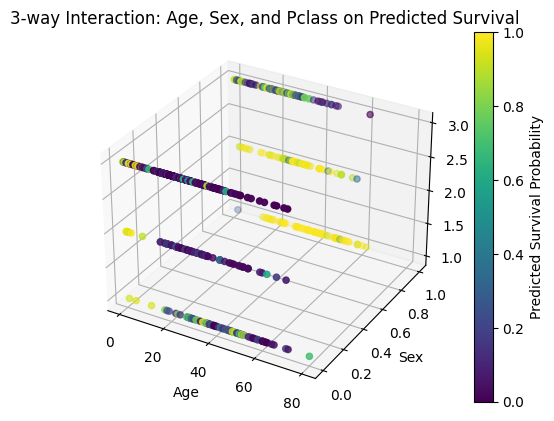

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Probability of survival
X_train['Predicted Survival'] = rf.predict_proba(X_train)[:, 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color by predicted survival probability
scatter = ax.scatter(X_train['Age'],
                     X_train['Sex'],
                     X_train['Pclass'],
                     c=X_train['Predicted Survival'],
                     cmap='viridis')

# Labels and titles
ax.set_xlabel('Age')
ax.set_ylabel('Sex')
ax.set_zlabel('Pclass')
ax.set_title('3-way Interaction: Age, Sex, and Pclass on Predicted Survival')

# Color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Predicted Survival Probability')

plt.show()


# Interpreting Multi-way Importance Plots

## Key Strategies for Interpretation:
1. **Dimensional Analysis:** Since these plots involve three variables, it's crucial to analyze them from different angles or dimensions. Each axis represents a feature, and the color or height (in case of 3D plots) represents the model's output.
2. **Feature Interaction:** Look for patterns that show how changes in two features might impact the relationship of the third feature with the prediction.
3. **Color Gradients or Height Variations:** These represent the model's prediction and are key to understanding the combined effect of the features.
4. **Limitations:** Remember the limitations of visualizing high-dimensional data. It might be challenging to capture the nuances of three-way interactions in a single plot.

## Practical Implications:
- **Advanced Insights:** These plots can offer advanced insights into the data, which can be critical for complex decision-making scenarios.
- **Modeling Strategy:** Understanding multi-way interactions might inform more complex feature engineering or model selection strategies.

Multi-way importance plots represent the frontier of model interpretability, offering deep insights but also requiring careful analysis and interpretation.


# Introduction to Min Depth Distribution Plots

## Exploring Min Depth Distribution Plots
Min Depth Distribution Plots are interpretability tools specific to tree-based machine learning models. They help in understanding at what depth a particular feature is used for the first time in the trees of the model.

## Key Concepts:
- **Decision Tree Depth:** In tree-based models, the depth of a tree is the length of the longest path from the root node to a leaf. A feature used at a shallower depth generally has a higher importance.
- **Feature Importance:** These plots indicate how early (in terms of tree depth) a feature contributes to a decision, offering a perspective on its importance relative to other features.
- **Distribution Analysis:** The plot typically shows a distribution (often a histogram) of the minimum depth at which a feature is used across all trees in the model.

Min Depth Distribution Plots are invaluable for understanding the dynamics of tree-based models, providing a clear picture of how and when different features come into play during the decision-making process.


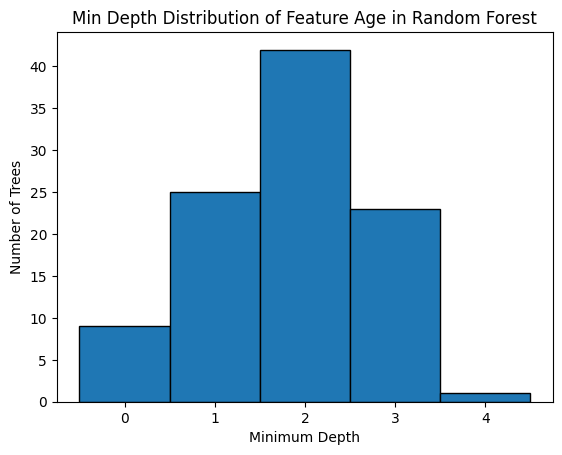

In [45]:
import numpy as np
from sklearn.tree import _tree

def min_depth_of_feature_in_tree(tree, feature_index):
    """
    Find the minimum depth at which the feature is used in the tree.
    """
    def recurse(node, current_depth):
        if tree.feature[node] == _tree.TREE_UNDEFINED:
            return np.inf
        if tree.feature[node] == feature_index:
            return current_depth
        return min(recurse(tree.children_left[node], current_depth + 1),
                   recurse(tree.children_right[node], current_depth + 1))

    return recurse(0, 0)

def plot_feature_min_depth_distribution(rf_model, feature_index, feature_name):
    """
    Plot the minimum depth distribution for a feature across all trees in the Random Forest.
    """
    depths = [min_depth_of_feature_in_tree(tree.tree_, feature_index) for tree in rf_model.estimators_]

    # Filter out infinities (cases where the feature is not used in a tree)
    depths = [depth for depth in depths if depth != np.inf]

    plt.hist(depths, bins=np.arange(max(depths)+2)-0.5, edgecolor='black')
    plt.title(f"Min Depth Distribution of Feature {feature_name} in Random Forest")
    plt.xlabel("Minimum Depth")
    plt.ylabel("Number of Trees")
    plt.xticks(np.arange(max(depths)+1))
    plt.show()

# Let's say we want to use Age
feature_list = X_train.columns.tolist()
age_feature_index = feature_list.index('Age')
plot_feature_min_depth_distribution(rf, feature_index=age_feature_index, feature_name='Age')


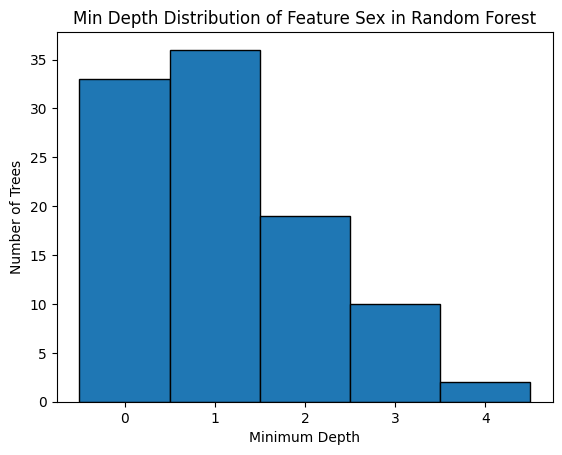

In [46]:
sex_feature_index = feature_list.index('Sex')
plot_feature_min_depth_distribution(rf, feature_index=sex_feature_index, feature_name='Sex')

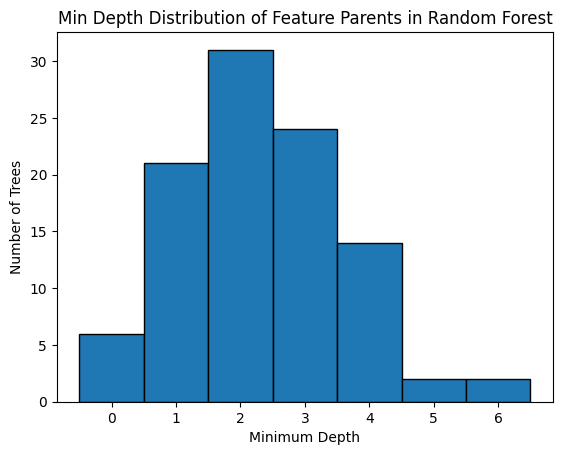

In [47]:
parents_feature_index = feature_list.index('Parents/Children Aboard')
plot_feature_min_depth_distribution(rf, feature_index=parents_feature_index, feature_name='Parents')

# Interpreting Min Depth Distribution Plots

## Key Strategies for Interpretation:
1. **Shallower Depths:** Features used at shallower depths (closer to the root of the trees) are generally more important. Look for features that frequently appear at low depth levels.
2. **Depth Distribution:** A wide distribution may indicate that the feature’s importance varies significantly across different trees, suggesting a more complex interaction with other features.
3. **Absence in Trees:** If a feature rarely appears in the trees (many occurrences of high depth or not at all), it might be less important for the model’s predictions.

## Practical Insights:
- **Feature Prioritization:** These plots can guide feature selection and prioritization, especially in feature engineering and model refinement.
- **Model Understanding:** Understanding at what depth features are used enhances the interpretability of tree-based models, providing insights into their decision-making process.

Min Depth Distribution Plots are a nuanced way to gauge feature importance in tree-based models, complementing other methods like feature importance scores or permutation importance.


# Introduction to SHAP Values

## What are SHAP Values?
SHAP (pronounced "shap" as in "sharp" without the 'r') stands for SHapley Additive exPlanations. SHAP values stem from game theory and provide a unified approach to explain the output of any machine learning model. They measure the impact of each feature on the prediction, offering detailed insights into model behavior.

## Origins:
- **Origin:** SHAP values are based on the Shapley values from cooperative game theory, introduced by Lloyd Shapley in 1953.

## Key Concepts:
- **Individual Predictions:** SHAP values explain the prediction for an individual instance by quantifying the contribution of each feature.
- **Fair Contribution:** They ensure a fair distribution of contribution among the features, based on the idea that each feature collaborates with others to impact the model's output.
- **Model Agnostic:** SHAP can be applied to any machine learning model, making it a versatile tool for model interpretation.

## Importance in Machine Learning:
- **Interpretability:** They help in understanding both the local (individual predictions) and global (overall model behavior) interpretations.
- **Decision Making:** By understanding how different features influence the model, stakeholders can make more informed decisions, especially in critical applications like healthcare or finance.


In [23]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.7 MB/s eta 0:00:00


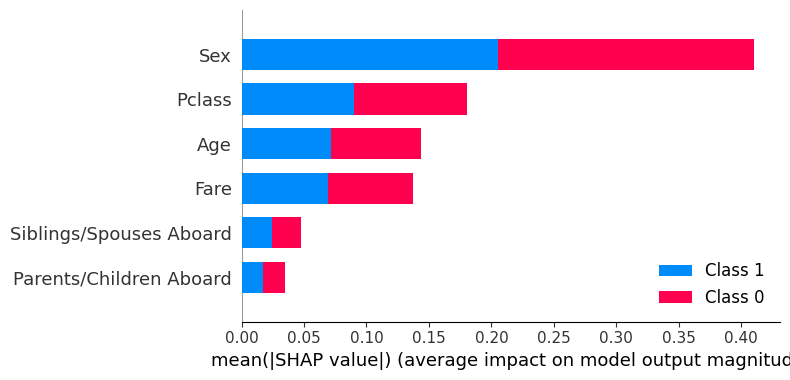

In [11]:
import shap
# Calculate SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, plot_type="bar")


# Interpreting SHAP Values

SHAP values provide a detailed understanding of feature contributions in complex models. Here's how to interpret them:

1. **Feature Importance:** Features with higher SHAP values (either positive or negative) are more influential in the model's decision-making process.
2. **Positive vs. Negative Impact:** A positive SHAP value for a feature indicates that the feature's value contributed to increasing the model's output, while a negative value indicates a decrease.
3. **Comparative Analysis:** Comparing SHAP values across features helps in understanding their relative importance.
4. **Local vs. Global Interpretation:** SHAP values can be used for both local (single prediction) and global (overall model) interpretation. The summary plot provides a global view.

## Practical Insights:
- **Model Transparency:** SHAP values enhance transparency by quantifying the impact of each feature.
- **Trust and Validation:** They help in validating the model against domain knowledge and building trust in its predictions.
- **Feature Engineering:** Insights from SHAP values can guide feature engineering and selection processes.

Interpreting SHAP values requires a balance between understanding individual feature contributions and the overall behavior of the model.


### Individual Prediction Explanation
You can explain the output of the model for an individual instance using SHAP values. This is particularly useful for understanding why the model made a specific prediction.

In [12]:
# Choose an instance (e.g., the first instance in the test set)
instance_index = 0
chosen_instance = X_test.iloc[instance_index]

# Calculate SHAP values for the chosen instance
shap_values_instance = explainer.shap_values(chosen_instance)

# Plot the SHAP values for the chosen instance
shap.initjs()  # Initialize JavaScript visualization in Jupyter Notebook
shap.force_plot(explainer.expected_value[1], shap_values_instance[1], chosen_instance)


In [13]:
# Choose an instance (e.g., the first instance in the test set)
instance_index = 64
chosen_instance = X_test.iloc[instance_index]

# Calculate SHAP values for the chosen instance
shap_values_instance = explainer.shap_values(chosen_instance)

# Plot the SHAP values for the chosen instance
shap.initjs()  # Initialize JavaScript visualization in Jupyter Notebook
shap.force_plot(explainer.expected_value[1], shap_values_instance[1], chosen_instance)


In [16]:
# Choose an instance (e.g., the first instance in the test set)
instance_index = 45
chosen_instance = X_test.iloc[instance_index]

# Calculate SHAP values for the chosen instance
shap_values_instance = explainer.shap_values(chosen_instance)

# Plot the SHAP values for the chosen instance
shap.initjs()  # Initialize JavaScript visualization in Jupyter Notebook
shap.force_plot(explainer.expected_value[1], shap_values_instance[1], chosen_instance)


# Interpreting Individual Prediction Explanation with SHAP

When interpreting SHAP values for individual predictions:
- **Feature Contributions:** Each feature contributes positively or negatively to the prediction, relative to the base value (average model output).
- **Red vs. Blue:** Features pushing the prediction higher (towards the positive class) are shown in red, while those pushing it lower are in blue.
- **Impact Size:** The length of the bar (left or right) shows the magnitude of the feature's impact.
- **Base Value to Output:** The plot moves from the base value to the final model output, demonstrating how each feature's contribution leads to the final decision.

This analysis helps understand why the model made a specific prediction for an individual instance, offering detailed insights into the decision-making process.


### SHAP Dependence Plots
Dependence plots show the effect of a single feature across the whole dataset, revealing potential patterns, like how feature interactions and non-linear relationships affect the output.


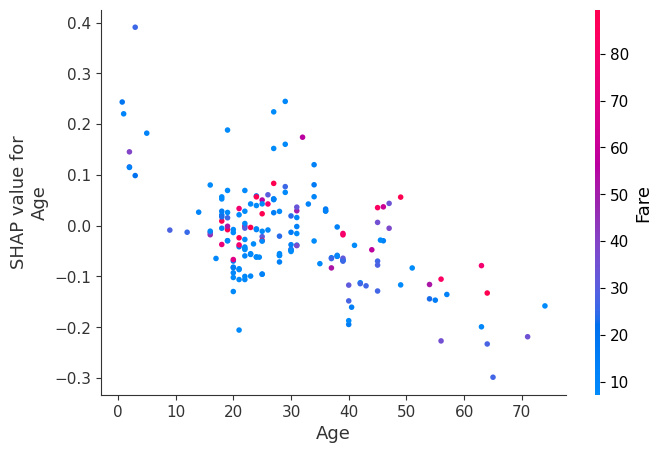

In [14]:
# Create a SHAP dependence plot for a specific feature (e.g., 'Age')
shap.dependence_plot('Age', shap_values[1], X_test)

# Interpreting SHAP Dependence Plots

SHAP Dependence Plots reveal the relationship between a single feature and the model's predictions:
- **Horizontal Axis:** Represents the value of the feature.
- **Vertical Axis:** Indicates the SHAP value for that feature, showing its impact on the prediction.
- **Data Density:** Color intensity shows the density of data points, highlighting common feature values.
- **Trends and Patterns:** Look for trends (linear, non-linear, or other patterns) indicating how feature values correlate with changes in predictions.

Dependence plots can uncover interactions and non-linear effects, providing a deeper understanding of how individual features influence model outcomes.


### SHAP Decision Plots
Decision plots provide a detailed view of how each feature contributes to moving the model output from the base value (the model’s average prediction) to the final prediction.

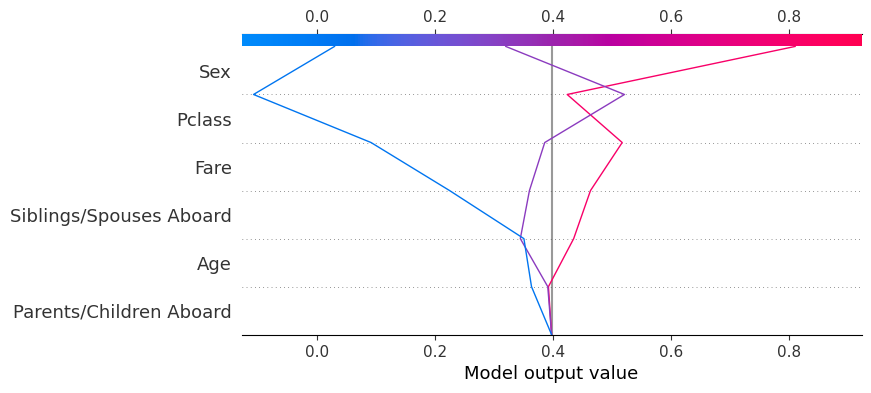

In [15]:
# Plot a SHAP decision plot for a few instances
sample_indices = [0, 1, 2]  # Indices of instances to plot
shap.decision_plot(explainer.expected_value[1], shap_values[1][sample_indices], X_test.iloc[sample_indices])

# Interpreting SHAP Decision Plots

SHAP Decision Plots offer a cumulative view of feature contributions:
- **Path of Prediction:** Each line represents the path from the base value to the final output for an individual prediction.
- **Feature Order:** Features are ordered based on their impact on the decision, from the bottom to the top of the plot.
- **Cumulative Impact:** The plot shows how each feature moves the prediction away from the base value, cumulatively leading to the final decision.
- **Comparative Analysis:** Comparing lines can reveal how different instances are treated differently by the model based on their feature values.

These plots are valuable for understanding the sequence and magnitude of feature contributions to individual predictions.


### SHAP Summary Plot (Advanced)
The SHAP summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.

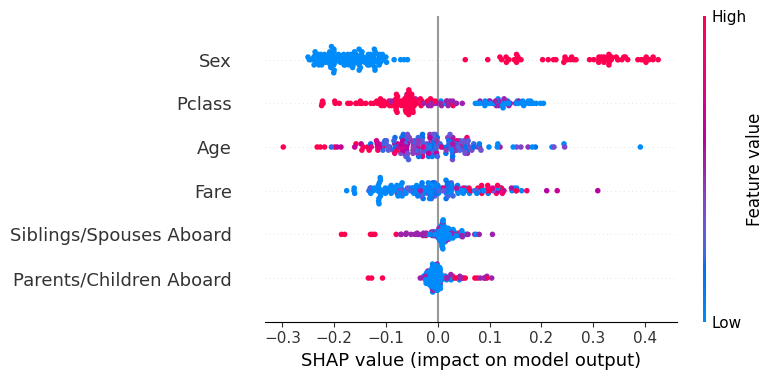

In [16]:
# Advanced SHAP summary plot showing feature impacts on model output
shap.summary_plot(shap_values[1], X_test)

# Interpreting Advanced SHAP Summary Plots

In Advanced SHAP Summary Plots:
- **Feature Ranking:** Features are ranked in descending order of importance.
- **Impact Direction and Magnitude:** Each dot represents a SHAP value for a feature and an instance. The horizontal position shows the impact magnitude, with color indicating the feature value (high or low).
- **Vertical Dispersion:** Vertical dispersion of dots for a feature indicates variability in that feature's impact across instances.
- **Feature Value Color Coding:** Colors can represent high and low values for the feature, showing how feature values correspond to higher or lower impacts on the model’s output.

These plots provide an overall view of feature importance and the direction of their effects, essential for understanding model behavior across the entire dataset.
